In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")


In [3]:
#print("Train data dimensions: ", train_data.shape)
#print("Test data dimensions: ", test_data.shape)
train_data = train_data.iloc[:,1:]

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 188.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [4]:
print("Number of missing values",train_data.isnull().sum().sum())

('Number of missing values', 0)


In [5]:
# setting pandas env variables to display max rows and columns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows',1000)

In [6]:
# describing statistics of continuous variables
train_data.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
# describing statistics of categorical variables
train_data.describe(include = ['object'])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


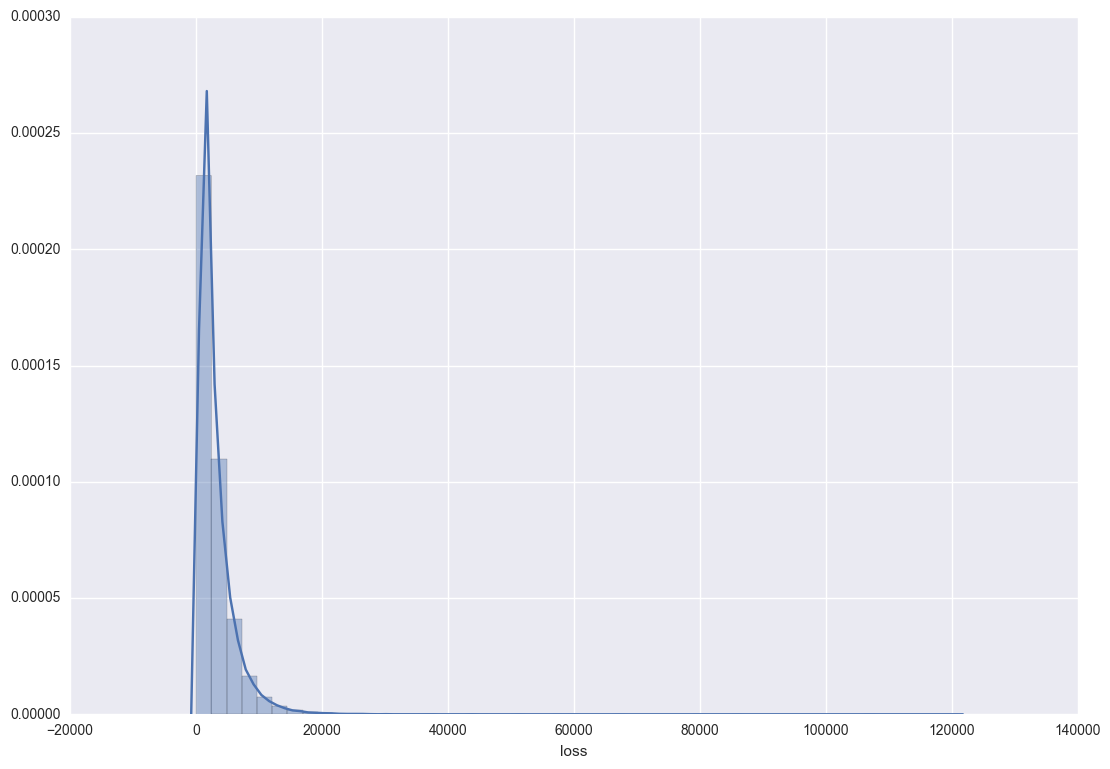

In [8]:
#Plot the distribution of the loss
plt.figure(figsize=(13,9))
sns.distplot(train_data["loss"])

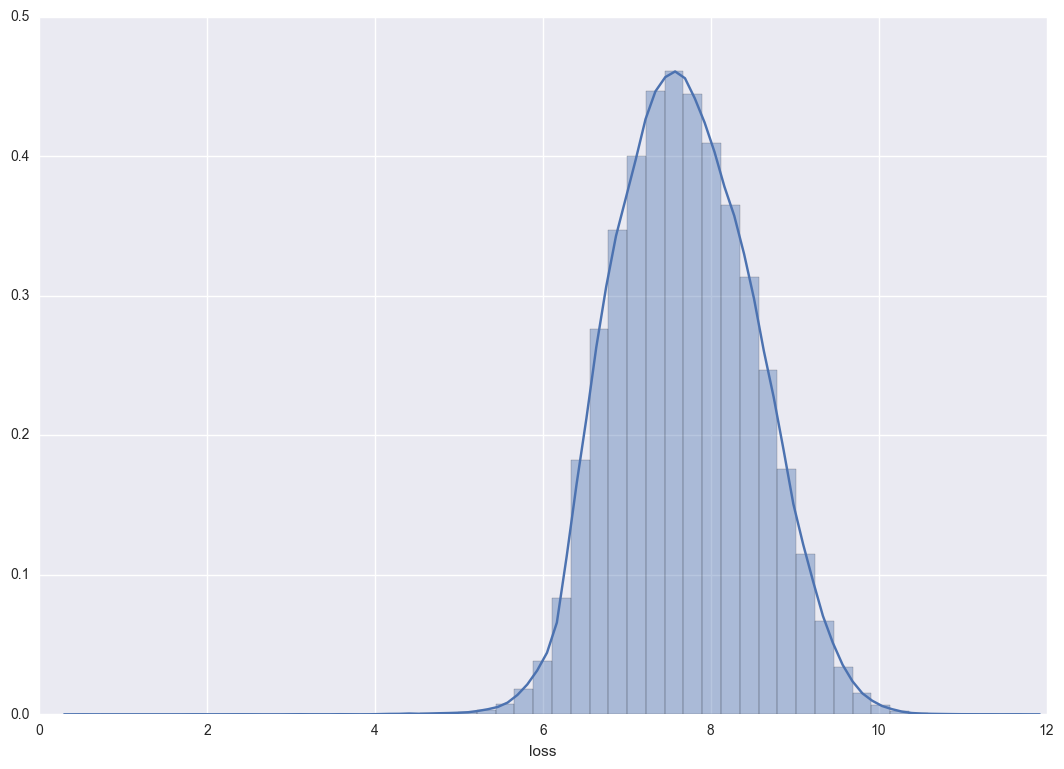

In [9]:
#There is considerable skewness to the right. Our algos may fail due to this. Let us try to normalize
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train_data["loss"]))

In [10]:
#Updating loss
train_data['loss'] = np.log1p(train_data["loss"])

In [11]:
#Describe loss column once again
train_data["loss"].describe()

count    188318.000000
mean          7.685908
std           0.811309
min           0.512824
25%           7.094617
50%           7.657552
75%           8.259729
max          11.703655
Name: loss, dtype: float64

In [12]:
# sepearte the categorical and continous features
cont_columns = []
cat_columns = []

for i in train_data.columns:
    if train_data[i].dtype == 'float':
        cont_columns.append(i)
    elif train_data[i].dtype == 'object':
        cat_columns.append(i)

In [13]:
print(train_data[cat_columns].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
cat31       2
cat32       2
cat33       2
cat34       2
cat35       2
cat36       2
cat37       2
cat38       2
cat39       2
cat40       2
cat41       2
cat42       2
cat43       2
cat44       2
cat45       2
cat46       2
cat47       2
cat48       2
cat49       2
cat50       2
cat51       2
cat52       2
cat53       2
cat54       2
cat55       2
cat56       2
cat57       2
cat58       2
cat59       2
cat60       2
cat61       2
cat62       2
cat63       2
cat64       2
cat65       2
cat66       2
cat67       2
cat68       2
cat69       2
cat70       2
cat71       2
cat72 

In [13]:
for cf1 in cat_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])

In [22]:
train_data.shape

(188318, 131)

In [16]:
filterG2 = list((train_data[cat_columns].apply(pd.Series.nunique) == 2))
catFeaturesG2List = [i for (i, v) in zip(cat_columns, filterG2) if v]
catFeaturesG2List.append("loss")
print(catFeaturesG2List)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'loss']


In [17]:
#Co-relation for categorical data having 2 unique values
corrCatMatrix = train_data[catFeaturesG2List].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries= s.order(kind="quicksort",ascending=False)

print("Top 10 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:10])

Top 10 most correlated categorical feature pairs: 

cat2   cat9     0.932420
cat9   cat2     0.932420
cat6   cat50    0.925731
cat50  cat6     0.925731
cat8   cat66    0.862231
cat66  cat8     0.862231
cat7   cat57    0.809418
cat57  cat7     0.809418
cat16  cat3     0.783480
cat3   cat16    0.783480
dtype: float64


In [18]:
#Co-relation for continuous data
corrContMatrix = train_data[cont_columns].corr().abs()

s = corrContMatrix.unstack()
sortedSeries= s.order(kind="quicksort",ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:10])

Top 5 most correlated categorical feature pairs: 

cont12  cont11    0.994384
cont11  cont12    0.994384
cont1   cont9     0.929912
cont9   cont1     0.929912
cont6   cont10    0.883351
cont10  cont6     0.883351
cont13  cont6     0.815091
cont6   cont13    0.815091
cont1   cont10    0.808551
cont10  cont1     0.808551
dtype: float64


In [89]:
#Starting XGBoost
import xgboost as xgb
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

features = [x for x in train_data.columns if x not in ['id','loss']]

In [90]:
#print(features)

test_data[features].head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [15]:
train_test = pd.concat((train_data[features], test_data[features])).reset_index(drop=True)

#train_test = np.concatenate((train_data_pred[features],test_data[features]),axis=0)

for f in train_test.columns: 
    if train_test[f].dtype=='object': 
        lbl = LabelEncoder() 
        lbl.fit(list(train_test[f].values)) 
        train_test[f] = lbl.transform(list(train_test[f].values))
    


In [16]:
train_x = train_test.iloc[:ntrain,:]

#for cf1 in cat_columns:
#    le = LabelEncoder()
#    le.fit(train_x[cf1].unique())
#    train_x[cf1] = le.transform(train_x[cf1])
    
test_x = train_test.iloc[ntrain:,:]

#for cf1 in cat_columns:
#    le = LabelEncoder()
#    le.fit(test_x[cf1].unique())
#    test_x[cf1] = le.transform(test_x[cf1])
    
train_x = np.array(train_x);
test_x = np.array(test_x);
print(test_x)

[[ 2.        3.        2.       ...,  0.369858  0.704052  0.392562]
 [ 2.        3.        2.       ...,  0.675759  0.453468  0.208045]
 [ 2.        3.        2.       ...,  0.241676  0.258586  0.297232]
 ..., 
 [ 3.        3.        2.       ...,  0.926619  0.848129  0.808125]
 [ 2.        2.        2.       ...,  0.301921  0.608259  0.361542]
 [ 2.        3.        2.       ...,  0.241676  0.287682  0.220323]]


In [80]:
#get the number of rows and columns
r, c = train_x.shape

#Y is the target column, X has the rest
X = train_x
Y = train_data['loss']

print X.shape
print ntrain

#Validation chunk size
val_size = 0.4

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

del X
del Y

(188318L, 130L)
188318


In [103]:
xgdmat = xgb.DMatrix(X_train, Y_train) # Create our DMatrix to make XGBoost more efficient

params = {'eta': 0.03, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3} 

# Grid Search CV optimized settings
num_rounds = 1
bst = xgb.train(params, xgdmat, num_boost_round = num_rounds)

In [104]:
val_xgb = xgb.DMatrix(X_val)
prediction = np.expm1(bst.predict(val_xgb))

In [105]:
print prediction


[ 1.02895236  1.02895236  1.0697155  ...,  1.12336922  1.02895236
  1.06166577]


In [106]:
print mean_absolute_error(np.expm1(Y_val), prediction)

3037.26790195


In [17]:
#Starting prediction

xgdmat = xgb.DMatrix(train_x, train_data['loss']) # Create our DMatrix to make XGBoost more efficient

params = {'eta': 0.01, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3} 

# Grid Search CV optimized settings
num_rounds = 3
bst = xgb.train(params, xgdmat, num_boost_round = num_rounds)

In [21]:
test_xgb = xgb.DMatrix(test_x)
print test_xgb

In [19]:
prediction = np.expm1(bst.predict(test_xgb))

In [20]:
print prediction

[ 1.04349685  1.04808533  1.04808533 ...,  1.04808533  1.04808533
  1.04349685]


In [ ]:

data_set = pd.read_csv("data/train.csv")
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y